In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,              # Use TeX for text rendering
    "font.family": "serif",
    "hatch.color": "white"
})


In [113]:
# pickle load file into dict

with open('../results/sentiment/sentiment_faithfulness.pkl', 'rb') as f:
    sentiment_faithfulness = pickle.load(f)

with open('../results/sentiment/sentiment_subtract_small.pkl', 'rb') as f:
    sentiment_subtraction_results = pickle.load(f)

with open('../results/sentiment/sentiment_mini_interactions_5.pkl', 'rb') as f:
    sentiment_recall_results = pickle.load(f)

In [114]:
color_dict = {'qsft_hard_0': '#896190',
               'qsft_soft_0': '#896190',
               'lime_0': '#86a76c',
               'linear_1': '#37537c',
               'linear_2': '#697fa0',
               'linear_3': '#9aa9c4',
               'linear_4': '#cad6e9',
               'faith_shapley_1': '#96474A',
               'faith_shapley_2': '#B2746B',
               'faith_shapley_3': '#CFA08C',
               'faith_shapley_4': '#EBCDAD',
               'shapley_taylor_2': '#B67B80',
               'shapley_taylor_3': '#D7B0B7',
               'shapley_taylor_4': '#F7E4ED',
               }
name_dict = {'qsft_hard_0': 'SpectralExplain',
               'qsft_soft_0': 'SpectralExplain',
               'lime_0': 'LIME',
               'linear_1': 'Banzhaf',
               'linear_2': 'Faith-Banzhaf\n2nd Order',
               'linear_3': 'Faith-Banzhaf\n3rd Order',
               'linear_4': 'Faith-Banzhaf\n4th Order',
               'faith_shapley_1': 'Shapley',
               'faith_shapley_2': 'Faith-Shap\n2nd Order',
               'faith_shapley_3': 'Faith-Shap\n3rd Order',
               'faith_shapley_4': 'Faith-Shap\n4th Order',
               'shapley_taylor_2': 'Shapley-Taylor\n2nd Order',
               'shapley_taylor_3': 'Shapley-Taylor\n3rd Order',
               'shapley_taylor_4': 'Shapley-Taylor\n4th Order',
               }

groups = ['8-15', '16-31', '32-63', '64-127', '128-255', '256-511', '512-1023', '1024-2047']

# Faithfulness

## Sentiment Analysis

### Fixed Samples, $B=8$

<Figure size 640x480 with 0 Axes>

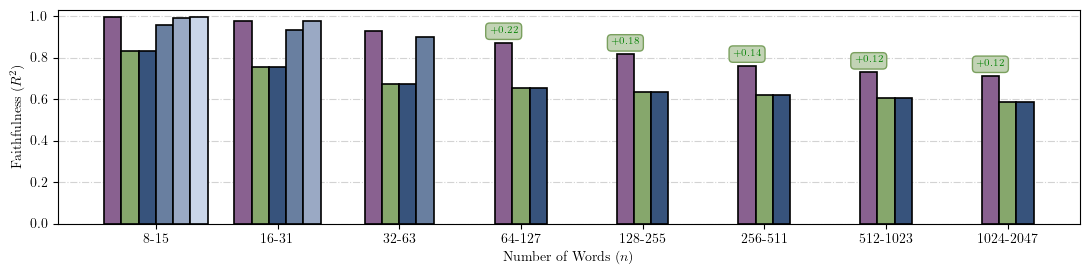

In [115]:
best_methods = ['qsft_soft_0', 'lime_0', 'linear_1', 'linear_2', 'linear_3', 'linear_4']
methods_per_group = [6,5,4,3,3,3,3,3]
plt.clf()

fig, ax = plt.subplots(figsize=(11, 2.85))
plt.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(8)
width = 0.85 / len(best_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(best_methods), 8))
for i, method in enumerate(best_methods):
    shifts = np.zeros(8)
    for j in range(8):
        sentiment_faithfulness_results[i, j] = np.mean(sentiment_faithfulness['methods'][method]['test_r2'][20 * j: 20 * (j + 1), 5])
        shifts[j] =  (i - (methods_per_group[j] - 1) / 2) * width
    ax.bar(x + shifts, sentiment_faithfulness_results[i, :], width, color=color_dict[method], ecolor='black', edgecolor='black',
           linewidth=1.2, zorder=2)

for j in range(3,8):
    spectral_explain_value = sentiment_faithfulness_results[0, j]
    lime_value = sentiment_faithfulness_results[1, j]
    ax.text(j-width, spectral_explain_value + 0.035, f"+{spectral_explain_value - lime_value:.2f}",
        ha='center', va='bottom', fontsize=7, color='green', bbox=dict(facecolor='#c2d3b5', edgecolor='#7aa05e', boxstyle='round,pad=0.4'))

plt.ylim(0, 1.03)
plt.xlabel("Number of Words ($n$)")
plt.ylabel("Faithfulness ($R^2$)")
plt.xticks(np.arange(8), groups)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
fig.tight_layout()
plt.savefig('sentiment_faithfulness_fixed.pdf', dpi=400, bbox_inches='tight')
plt.show()

### Changing samples for bucket $n=16-31$, $B=4, 6, 8$

<Figure size 640x480 with 0 Axes>

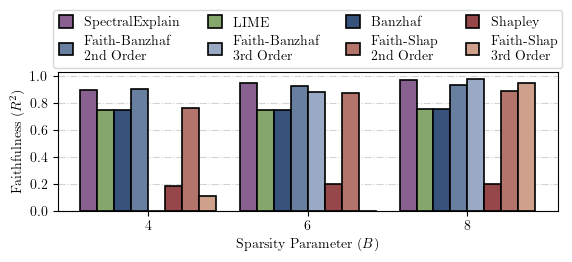

In [116]:
best_methods = ['qsft_soft_0', 'lime_0', 'linear_1', 'linear_2', 'linear_3', 'faith_shapley_1', 'faith_shapley_2', 'faith_shapley_3']
plt.clf()

fig, ax = plt.subplots(figsize=(6, 3.3))
plt.grid(True, axis='y', zorder=3, color="lightgray", linewidth="0.8", linestyle="-.")

x = np.arange(3)
width = 0.85 / len(best_methods)  # Adjust the width to fit all bars without overlap

sentiment_faithfulness_results = np.zeros((len(best_methods), 3))
for i, method in enumerate(best_methods):
    for idx_j, j in enumerate([1,3,5]):
        sentiment_faithfulness_results[i, idx_j] = np.mean(sentiment_faithfulness['methods'][method]['test_r2'][20:40, j])
    ax.bar(x + (i - (len(best_methods) - 1) / 2) * width, sentiment_faithfulness_results[i, :], width, color=color_dict[method], ecolor='black', edgecolor='black',linewidth=1.2, zorder=2, label=name_dict[method])
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,1,4,2,6,5,7]

ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=len(best_methods)/2, fontsize=10, frameon=True, handlelength=1, handleheight=1)
plt.ylim(0, 1.03)
plt.xlabel("Sparsity Parameter ($B$)")
plt.ylabel("Faithfulness ($R^2$)")
plt.xticks(np.arange(3), [4,6,8])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
fig.tight_layout()
plt.savefig('sentiment_faithfulness_dynamic.pdf', dpi=400, bbox_inches='tight')
plt.show()

# Fidelity

## Sentiment Analysis

<Figure size 640x480 with 0 Axes>

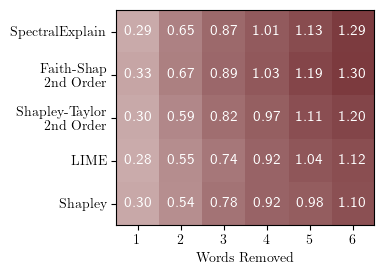

In [140]:
best_methods = ['qsft_hard_0','faith_shapley_2', 'shapley_taylor_2', 'lime_0', 'faith_shapley_1']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#caabab', '#7c3a3e'])
plt.clf()
fig, ax = plt.subplots(figsize=(6.12, 2.85))
subtraction_distance = 6
subtraction_results = np.zeros((len(best_methods), subtraction_distance))
for i, method in enumerate(best_methods):
    delta_results = sentiment_subtraction_results['methods'][method]['delta']
    subtraction_results[i,:] = np.mean(delta_results[0:20,0,1:subtraction_distance+1], axis=0)
for i in range(subtraction_results.shape[0]):
    for j in range(subtraction_results.shape[1]):
        value = rf"\textsf{{{subtraction_results[i,j]:.2f}}}"  # Format to 2 decimal places
        ax.text(j, i, value, ha='center', va='center', color='white', fontsize=11)
ax.imshow(subtraction_results, cmap=cmap)
plt.xlabel('Words Removed')
plt.yticks(range(5), labels=[name_dict[method] for method in best_methods])
plt.xticks(range(6), labels=[1,2,3,4,5,6])
plt.tight_layout()
plt.savefig('sentiment_fidelity.pdf', dpi=400, bbox_inches='tight')
plt.show()

# Recall

## Sentiment Analysis

In [142]:
sentiment_recall_results['methods']['Regression']['recall_k'].shape

(20, 6, 5)

<Figure size 640x480 with 0 Axes>

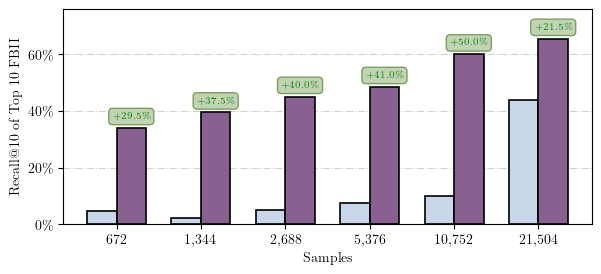

In [153]:
plt.clf()
# Plotting each type of data
fig, ax = plt.subplots(figsize=(6.12, 2.85))
plt.grid(True, axis='y', zorder=3, color = "lightgray", linewidth = "0.8", linestyle = "-.")
# Bar plot settings
x = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

mean_regression = np.mean(sentiment_recall_results['methods']['Regression']['recall_k'][:,:,1], axis=0)
ax.bar(x + -0.5 * width, mean_regression, width, color='#CAD6E9', ecolor='black', edgecolor='black',
       linewidth=1.2, zorder=2)

mean_se = np.mean(sentiment_recall_results['methods']['SpectralExplainSoft']['recall_k'][:,:,1], axis=0)
ax.bar(x + 0.5 * width, mean_se, width, label='SpectralExplain\nSoft', color="#896190", ecolor='black', edgecolor='black',
       linewidth=1.2, zorder=2)
for j in range(6):
    ax.text(j + (width / 2), mean_se[j] + 0.025, f"+{100*(mean_se[j] - mean_regression[j]):.1f}\%",
        ha='center', va='bottom', fontsize=7, color='green', bbox=dict(facecolor='#c2d3b5', edgecolor='#7aa05e', boxstyle='round,pad=0.4'))

plt.ylim(0,0.76)
plt.xlabel("Samples")
plt.ylabel("Recall@10 of Top 10 FBII")
plt.xticks(range(6), [f"{s:,}" for s in [672, 1344, 2688, 5376, 10752, 21504]])
plt.yticks([0,0.2,0.4,0.6], ["0\%","20\%","40\%","60\%"])
plt.tight_layout()
plt.savefig('sentiment_recall.pdf', dpi=400, bbox_inches='tight')
plt.show()